In [17]:
import xlrd
import xlwt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
data = pd.read_excel('data.xlsx')

del data['FROM DATE']
del data['TO DATE']

names = data.columns


In [18]:
data #16234 rows

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
0,19.23,987.00,382,125,79.67,7.00,240.67,0.90,0.40,2.53,60.60,30.60,37.87,68.47,4.67,4.73,1.40
1,19.10,987.00,382,125,80.33,7.00,267.67,0.77,1.00,1.77,42.13,41.30,31.47,61.77,3.10,14.13,1.40
2,19.03,987.00,382,125,80.67,7.33,188.33,0.33,0.33,2.00,66.73,28.70,43.17,71.80,4.30,4.33,1.40
3,18.83,987.00,382,125,81.00,7.00,272.33,0.77,0.37,1.90,69.70,29.77,60.53,90.17,4.53,4.70,1.40
4,18.60,987.00,399,130,82.67,7.00,267.00,0.83,0.53,1.90,21.50,29.20,54.30,83.50,2.63,4.63,1.30
5,18.43,986.00,399,130,83.33,7.00,271.33,0.90,0.40,1.70,67.00,26.80,43.03,69.43,3.93,5.07,0.93
6,18.53,986.00,345,138,82.00,7.33,265.67,0.87,0.33,1.70,69.57,28.00,35.23,63.33,4.90,5.13,1.07
7,18.20,986.00,345,138,84.33,8.00,245.67,0.60,0.30,1.87,71.73,24.03,38.00,62.00,4.87,5.20,1.10
8,17.73,986.00,345,138,86.67,8.00,248.67,0.80,0.30,1.90,78.70,25.77,30.07,55.73,5.03,4.47,1.07
9,17.53,986.00,345,138,88.00,8.00,270.67,0.83,0.37,2.07,84.90,22.93,26.17,49.07,5.00,5.07,1.07


In [19]:
data.drop_duplicates(inplace=True)  # removing duplicates

In [20]:
data #16229 rows

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
0,19.23,987.00,382,125,79.67,7.00,240.67,0.90,0.40,2.53,60.60,30.60,37.87,68.47,4.67,4.73,1.40
1,19.10,987.00,382,125,80.33,7.00,267.67,0.77,1.00,1.77,42.13,41.30,31.47,61.77,3.10,14.13,1.40
2,19.03,987.00,382,125,80.67,7.33,188.33,0.33,0.33,2.00,66.73,28.70,43.17,71.80,4.30,4.33,1.40
3,18.83,987.00,382,125,81.00,7.00,272.33,0.77,0.37,1.90,69.70,29.77,60.53,90.17,4.53,4.70,1.40
4,18.60,987.00,399,130,82.67,7.00,267.00,0.83,0.53,1.90,21.50,29.20,54.30,83.50,2.63,4.63,1.30
5,18.43,986.00,399,130,83.33,7.00,271.33,0.90,0.40,1.70,67.00,26.80,43.03,69.43,3.93,5.07,0.93
6,18.53,986.00,345,138,82.00,7.33,265.67,0.87,0.33,1.70,69.57,28.00,35.23,63.33,4.90,5.13,1.07
7,18.20,986.00,345,138,84.33,8.00,245.67,0.60,0.30,1.87,71.73,24.03,38.00,62.00,4.87,5.20,1.10
8,17.73,986.00,345,138,86.67,8.00,248.67,0.80,0.30,1.90,78.70,25.77,30.07,55.73,5.03,4.47,1.07
9,17.53,986.00,345,138,88.00,8.00,270.67,0.83,0.37,2.07,84.90,22.93,26.17,49.07,5.00,5.07,1.07


In [21]:
limit = {}
def IQR_outlier(dt,name):

    q1 = dt.quantile(.25)
    q3 = dt.quantile(.75)
    iqr = q3 -q1
    l_limit = q1 - 1.5*iqr
    r_limit = q3 + 1.5*iqr
    l_limit = round(l_limit,2)
    r_limit = round(r_limit,2)
    limit[name]=[l_limit,r_limit]

def removal_outlier(st,name):
    st = st[st < limit[name][1]]
    st = st[st > limit[name][0]]
    return st
    

for i in range(len(names)):
    IQR_outlier(data[names[i]],names[i])

for i in range(len(names)):
    data[names[i]] = removal_outlier(data[names[i]],names[i])
    
data = data.dropna() #to remove NaN values

In [24]:
data.describe() #10250 rows

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
count,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000
mean,29.840606,977.875407,186.178732,52.789366,63.084952,96.092257,192.617477,1.130559,0.936471,14.052337,32.755523,25.587200,9.390158,28.095881,8.760907,40.299637,1.149113
std,4.541722,4.937947,107.617515,36.216506,27.940288,131.635532,101.894035,0.460502,0.855817,13.138093,17.566358,12.578633,9.408340,16.389743,5.655685,36.699542,0.473508
min,15.730000,967.000000,5.000000,0.000000,5.000000,4.330000,0.100000,0.100000,0.000000,0.000000,0.100000,4.300000,0.000000,0.100000,0.100000,0.200000,0.010000
25%,26.900000,973.500000,105.250000,28.000000,40.925000,9.330000,98.307500,0.800000,0.300000,1.200000,20.400000,15.500000,2.930000,15.900000,4.770000,11.007500,0.800000
50%,29.700000,977.670000,174.000000,44.000000,60.400000,15.100000,216.100000,1.100000,0.600000,13.900000,28.800000,23.000000,5.600000,23.850000,7.900000,27.400000,1.100000
75%,32.900000,982.000000,246.000000,69.000000,98.900000,148.692500,276.330000,1.400000,1.300000,22.900000,43.370000,33.000000,12.400000,36.300000,12.000000,59.000000,1.400000
max,43.530000,990.330000,599.000000,190.000000,99.100000,500.330000,359.900000,2.430000,3.900000,60.100000,86.970000,73.500000,46.700000,95.600000,26.000000,151.100000,2.930000


In [25]:
# x = sd * z_score_val + mean;
#names-->AT	BP	PM10	PM2.5	RH	SR	WD	WS	BENZENE	TOLUENE	NH3	NO2	NO	NOX	SO2	OZONE	CO
#mean	29.840606	977.875407	186.178732	52.789366	63.084952	96.092257	192.617477	1.130559	0.936471	14.052337	32.755523	25.587200	9.390158	28.095881	8.760907	40.299637	1.149113
#std	4.541722	4.937947	107.617515	36.216506	27.940288	131.635532	101.894035	0.460502	0.855817	13.138093	17.566358	12.578633	9.408340	16.389743	5.655685	36.699542	0.473508

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
1,-0.401134,0.397846,0.408027,0.472635,0.180539,-0.182136,0.209704,-0.160900,0.030961,-0.225913,0.117893,0.286160,0.620431,0.466553,-0.219028,-0.182988,0.117051
6,-0.422167,0.354983,0.334468,0.553380,0.198286,-0.181457,0.204146,-0.117982,-0.160467,-0.227226,0.439468,0.060353,0.720431,0.486847,-0.148715,-0.243016,-0.013902
8,-0.451687,0.354983,0.334468,0.553380,0.247914,-0.180078,0.156897,-0.148025,-0.169039,-0.223473,0.546465,0.022493,0.583197,0.387978,-0.143637,-0.247418,-0.013902
9,-0.459067,0.354983,0.334468,0.553380,0.262048,-0.180078,0.218042,-0.135149,-0.149039,-0.220284,0.619124,-0.025725,0.479474,0.301339,-0.144809,-0.243416,-0.013902
49,-0.065340,0.369128,0.342421,0.690026,-0.279928,0.379512,0.331994,-0.006394,-0.169039,-0.233417,0.314776,-0.182940,-0.188079,-0.145390,0.307144,0.662340,-0.160727
50,-0.070137,0.354983,0.342421,0.690026,-0.308302,0.351388,0.367181,0.066567,-0.169039,-0.236607,0.246101,-0.220971,-0.184622,-0.172188,0.218472,0.648533,-0.228188
51,-0.077518,0.354983,0.342421,0.690026,-0.308302,0.331515,0.335691,0.139529,-0.169039,-0.230978,0.171098,-0.218085,-0.188079,-0.171798,0.159879,0.591373,-0.228188
52,-0.056853,0.354983,0.342421,0.690026,-0.322436,0.638055,0.383857,-0.062188,-0.197610,-0.229102,0.171450,-0.214180,-0.173984,-0.162301,0.136441,0.562693,-0.240092
55,-0.022167,0.312120,0.109816,0.186920,-0.301182,0.542719,0.101311,0.152404,-0.197610,-0.236607,0.145316,-0.240156,-0.191803,-0.190921,0.071207,0.567362,-0.240092
56,-0.024750,0.312120,0.109816,0.186920,-0.297675,0.330815,-0.198856,0.336954,-0.197610,-0.238483,0.153871,-0.231158,-0.196058,-0.186498,0.128629,0.544952,-0.240092


In [26]:
from scipy.stats import zscore
data = data.apply(zscore)   

In [27]:
data

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
0,-2.336365,1.847942,1.819693,1.993957,0.593618,-0.676843,0.471616,-0.500693,-0.626884,-0.877060,1.585180,0.398537,3.027232,2.463497,-0.723362,-0.969259,0.529873
1,-2.364990,1.847942,1.819693,1.993957,0.617241,-0.676843,0.736610,-0.783008,0.074235,-0.934910,0.533687,1.249227,2.346952,2.054685,-1.000972,-0.713113,0.529873
2,-2.380404,1.847942,1.819693,1.993957,0.629410,-0.674336,-0.042080,-1.738533,-0.708681,-0.917403,1.934159,0.247479,3.590590,2.666683,-0.788786,-0.980159,0.529873
5,-2.512519,1.645419,1.977667,2.132022,0.724618,-0.676843,0.772532,-0.500693,-0.626884,-0.940238,1.949530,0.096422,3.575709,2.522073,-0.854210,-0.959994,-0.462767
6,-2.490500,1.645419,1.475866,2.352927,0.677014,-0.674336,0.716981,-0.565843,-0.708681,-0.940238,2.095840,0.191827,2.746617,2.149871,-0.682693,-0.958359,-0.167087
7,-2.563163,1.645419,1.475866,2.352927,0.760410,-0.669246,0.520689,-1.152188,-0.743737,-0.927298,2.218808,-0.123803,3.041051,2.068719,-0.687998,-0.956452,-0.103727
8,-2.666653,1.645419,1.475866,2.352927,0.844164,-0.669246,0.550133,-0.717858,-0.743737,-0.925015,2.615609,0.014533,2.198140,1.686144,-0.659706,-0.976344,-0.167087
9,-2.710691,1.645419,1.475866,2.352927,0.891768,-0.669246,0.766054,-0.652709,-0.661940,-0.912075,2.968573,-0.211257,1.783594,1.279772,-0.665011,-0.959994,-0.167087
10,-2.635826,1.645419,1.420110,3.374610,0.808372,-0.666739,0.635127,-0.283528,0.693557,-1.006461,-0.155163,1.230941,1.574195,2.540378,-1.213158,-0.547708,-0.167087
11,-2.732710,1.645419,1.420110,3.374610,0.903580,-0.661649,0.360319,-0.717858,0.658501,-1.014073,-0.016255,0.814341,0.819509,2.091295,-1.266205,-0.490483,-0.589487


In [29]:
data.corr()

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
AT,1.000000,-0.457192,0.177801,-0.133676,-0.502241,0.389787,-0.072194,0.235167,-0.037785,-0.045820,-0.087953,-0.085079,-0.312116,-0.133494,-0.109949,0.563026,-0.025305
BP,-0.457192,1.000000,0.192743,0.401364,-0.293618,-0.001168,0.036875,0.005196,-0.052111,-0.383387,0.211136,-0.016080,0.056211,0.198441,-0.115057,0.111625,0.096315
PM10,0.177801,0.192743,1.000000,0.699681,-0.458984,0.088844,0.015246,0.006793,0.079836,-0.201784,0.296252,0.235553,0.190462,0.384757,-0.040912,0.147225,0.251413
PM2.5,-0.133676,0.401364,0.699681,1.000000,-0.392205,-0.008512,-0.042380,-0.090228,-0.011151,-0.344452,0.458550,0.230861,0.193174,0.444240,-0.058114,0.099886,0.192852
RH,-0.502241,-0.293618,-0.458984,-0.392205,1.000000,-0.196586,-0.020290,-0.201683,0.261413,0.630630,-0.234626,0.105568,0.270927,-0.171645,0.311829,-0.636818,0.096000
SR,0.389787,-0.001168,0.088844,-0.008512,-0.196586,1.000000,0.086812,0.242405,-0.012604,-0.020644,0.010458,-0.252903,-0.111528,-0.152959,-0.004764,0.319708,-0.155229
WD,-0.072194,0.036875,0.015246,-0.042380,-0.020290,0.086812,1.000000,-0.144642,-0.050312,0.000474,-0.182486,-0.184189,0.072466,-0.105961,0.063633,-0.018215,-0.132710
WS,0.235167,0.005196,0.006793,-0.090228,-0.201683,0.242405,-0.144642,1.000000,-0.163048,-0.211074,-0.005003,-0.390439,-0.301635,-0.223786,-0.179146,0.304724,-0.237066
BENZENE,-0.037785,-0.052111,0.079836,-0.011151,0.261413,-0.012604,-0.050312,-0.163048,1.000000,0.694213,-0.226845,0.377771,0.171764,0.024582,0.245625,-0.080184,0.312064
TOLUENE,-0.045820,-0.383387,-0.201784,-0.344452,0.630630,-0.020644,0.000474,-0.211074,0.694213,1.000000,-0.297120,0.333171,0.204270,-0.174021,0.422306,-0.303257,0.295696


In [31]:
data[['SO2','NO2','PM2.5','PM10']].corr()

,SO2,NO2,PM2.5,PM10
SO2,1.000000,0.151494,-0.058114,-0.040912
NO2,0.151494,1.000000,0.230861,0.235553
PM2.5,-0.058114,0.230861,1.000000,0.699681
PM10,-0.040912,0.235553,0.699681,1.000000


In [32]:
data.describe()

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
count,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04,1.025000e+04
mean,-1.095360e-15,6.519706e-15,-9.292946e-16,1.080372e-15,3.743347e-17,3.488592e-16,9.234889e-17,-5.832733e-17,-3.228377e-15,-2.099134e-16,-3.855480e-16,2.126429e-16,1.663412e-16,2.278286e-16,8.619230e-16,8.982517e-17,1.417592e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-3.107036e+00,-2.202522e+00,-1.683625e+00,-1.457676e+00,-2.078997e+00,-6.971274e-01,-1.889481e+00,-2.238012e+00,-1.094296e+00,-1.069639e+00,-1.859072e+00,-1.692413e+00,-9.981162e-01,-1.708218e+00,-1.531438e+00,-1.092700e+00,-2.405808e+00
25%,-6.474965e-01,-8.861214e-01,-7.520400e-01,-6.845104e-01,-7.931569e-01,-6.591419e-01,-9.256143e-01,-7.178581e-01,-7.437367e-01,-9.782975e-01,-7.033971e-01,-8.019705e-01,-6.866752e-01,-7.441530e-01,-7.056797e-01,-7.981998e-01,-7.373274e-01
50%,-3.096022e-02,-4.159965e-02,-1.131723e-01,-2.427013e-01,-9.610077e-02,-6.153066e-01,2.304715e-01,-6.636347e-02,-3.931773e-01,-1.159560e-02,-2.251870e-01,-2.056922e-01,-4.028705e-01,-2.590698e-01,-1.522272e-01,-3.515103e-01,-1.037271e-01
75%,6.736527e-01,8.353258e-01,5.558964e-01,4.476253e-01,1.281905e+00,3.996095e-01,8.216046e-01,5.851312e-01,4.247949e-01,6.734688e-01,6.042798e-01,5.893456e-01,3.199277e-01,5.005886e-01,5.727424e-01,5.095779e-01,5.298733e-01
max,3.014289e+00,2.522344e+00,3.836192e+00,3.788806e+00,1.289063e+00,3.071036e+00,1.641810e+00,2.821930e+00,3.462977e+00,3.505068e+00,3.086418e+00,3.809249e+00,3.965807e+00,4.118882e+00,3.048249e+00,3.019268e+00,3.761235e+00


In [33]:
def removal_outlier1(st,name):
    st = st[st < 3]
    st = st[st > -3]
    return st
for i in range(len(names)):
    data[names[i]] = removal_outlier1(data[names[i]],names[i])
    #data[names[i]]
data = data.dropna()

In [34]:
data

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
1,-2.364990,1.847942,1.819693,1.993957,0.617241,-0.676843,0.736610,-0.783008,0.074235,-0.934910,0.533687,1.249227,2.346952,2.054685,-1.000972,-0.713113,0.529873
6,-2.490500,1.645419,1.475866,2.352927,0.677014,-0.674336,0.716981,-0.565843,-0.708681,-0.940238,2.095840,0.191827,2.746617,2.149871,-0.682693,-0.958359,-0.167087
8,-2.666653,1.645419,1.475866,2.352927,0.844164,-0.669246,0.550133,-0.717858,-0.743737,-0.925015,2.615609,0.014533,2.198140,1.686144,-0.659706,-0.976344,-0.167087
9,-2.710691,1.645419,1.475866,2.352927,0.891768,-0.669246,0.766054,-0.652709,-0.661940,-0.912075,2.968573,-0.211257,1.783594,1.279772,-0.665011,-0.959994,-0.167087
49,-0.361248,1.712251,1.513036,2.960414,-0.933642,1.397166,1.168452,-0.001214,-0.743737,-0.965357,1.490107,-0.947462,-0.884382,-0.815543,1.380818,2.740505,-0.948528
50,-0.389872,1.645419,1.513036,2.960414,-1.029208,1.293314,1.292705,0.367966,-0.743737,-0.978298,1.156499,-1.125551,-0.870564,-0.941237,0.979433,2.684098,-1.307568
51,-0.433911,1.645419,1.513036,2.960414,-1.029208,1.219926,1.181506,0.737147,-0.743737,-0.955462,0.792148,-1.112035,-0.884382,-0.939407,0.714200,2.450569,-1.307568
52,-0.310603,1.645419,1.513036,2.960414,-1.076811,2.351894,1.351593,-0.283528,-0.860590,-0.947850,0.793856,-1.093749,-0.828046,-0.894864,0.608107,2.333395,-1.370928
55,-0.103623,1.442895,0.425800,0.723756,-1.005227,1.999844,0.353841,0.802296,-0.860590,-0.978298,0.666903,-1.215390,-0.899263,-1.029101,0.312814,2.352470,-1.370928
56,-0.119037,1.442895,0.425800,0.723756,-0.993415,1.217343,-0.706135,1.736105,-0.860590,-0.985909,0.708461,-1.173253,-0.916270,-1.008355,0.572742,2.260911,-1.370928


/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


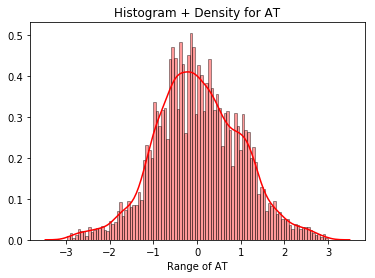

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


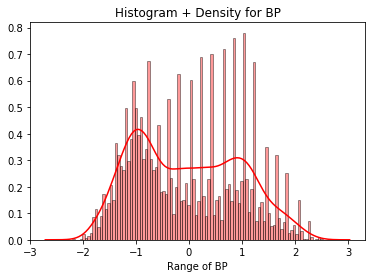

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


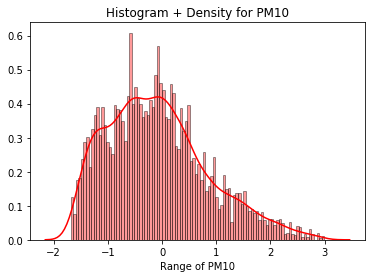

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


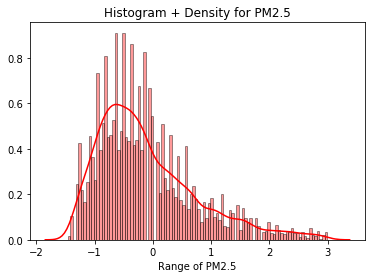

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


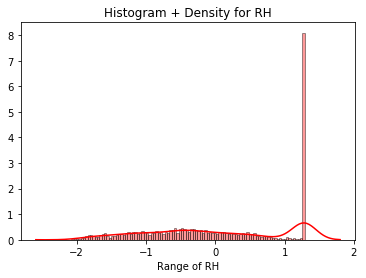

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


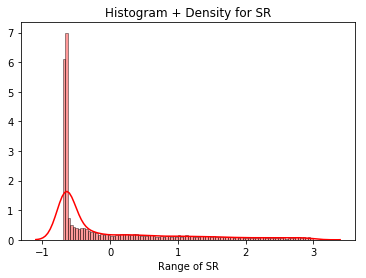

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


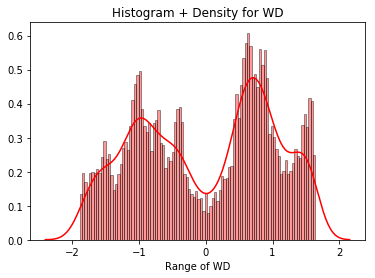

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


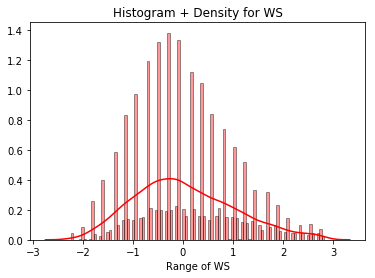

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


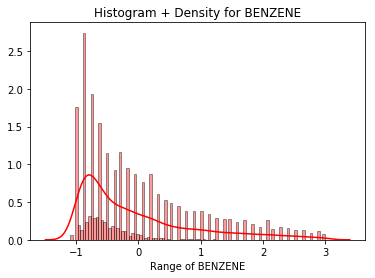

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


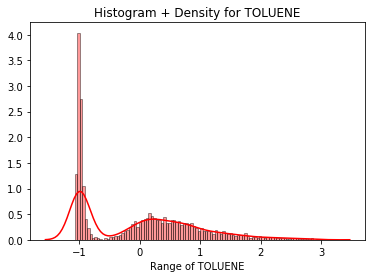

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


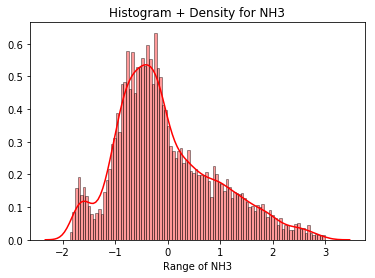

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


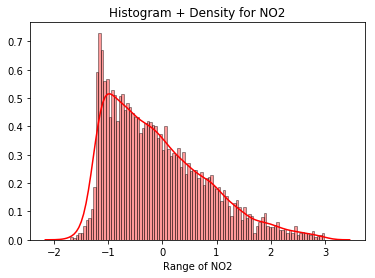

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


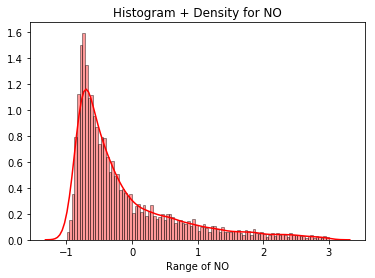

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


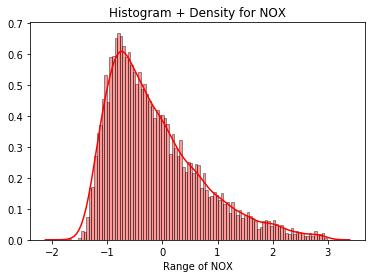

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


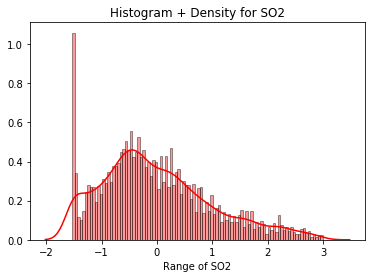

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


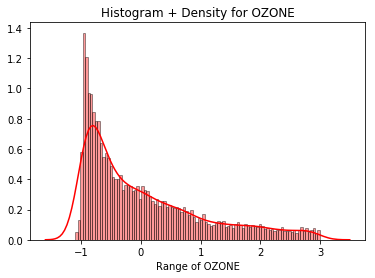

/home/rushi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


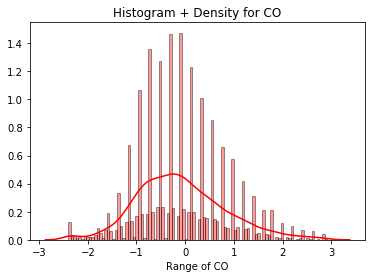

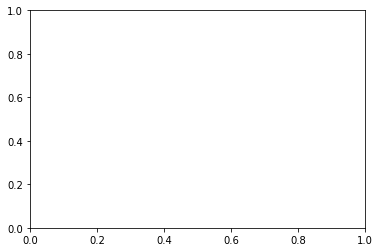

In [35]:
for i in range(len(names)):
    # data[names[i]].plot(kind='dist',bins=10)

    sns.distplot(data[names[i]], hist=True, kde=True, bins=100, color = 'red',hist_kws={'edgecolor':'black'})
    plt.xlabel('Range of '+str(names[i]))
    plt.title('Histogram + Density for '+str(names[i]))
    plt.show()
    # plt.savefig('img_dense/'+str(names[i])+'.png')
    plt.clf()
    plt.cla()
    # exit()

In [36]:
 data_norm = (data - data.mean()) / (data.max() - data.min())
data_norm

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
1,-0.401134,0.397846,0.408027,0.472635,0.180539,-0.182136,0.209704,-0.160900,0.030961,-0.225913,0.117893,0.286160,0.620431,0.466553,-0.219028,-0.182988,0.117051
6,-0.422167,0.354983,0.334468,0.553380,0.198286,-0.181457,0.204146,-0.117982,-0.160467,-0.227226,0.439468,0.060353,0.720431,0.486847,-0.148715,-0.243016,-0.013902
8,-0.451687,0.354983,0.334468,0.553380,0.247914,-0.180078,0.156897,-0.148025,-0.169039,-0.223473,0.546465,0.022493,0.583197,0.387978,-0.143637,-0.247418,-0.013902
9,-0.459067,0.354983,0.334468,0.553380,0.262048,-0.180078,0.218042,-0.135149,-0.149039,-0.220284,0.619124,-0.025725,0.479474,0.301339,-0.144809,-0.243416,-0.013902
49,-0.065340,0.369128,0.342421,0.690026,-0.279928,0.379512,0.331994,-0.006394,-0.169039,-0.233417,0.314776,-0.182940,-0.188079,-0.145390,0.307144,0.662340,-0.160727
50,-0.070137,0.354983,0.342421,0.690026,-0.308302,0.351388,0.367181,0.066567,-0.169039,-0.236607,0.246101,-0.220971,-0.184622,-0.172188,0.218472,0.648533,-0.228188
51,-0.077518,0.354983,0.342421,0.690026,-0.308302,0.331515,0.335691,0.139529,-0.169039,-0.230978,0.171098,-0.218085,-0.188079,-0.171798,0.159879,0.591373,-0.228188
52,-0.056853,0.354983,0.342421,0.690026,-0.322436,0.638055,0.383857,-0.062188,-0.197610,-0.229102,0.171450,-0.214180,-0.173984,-0.162301,0.136441,0.562693,-0.240092
55,-0.022167,0.312120,0.109816,0.186920,-0.301182,0.542719,0.101311,0.152404,-0.197610,-0.236607,0.145316,-0.240156,-0.191803,-0.190921,0.071207,0.567362,-0.240092
56,-0.024750,0.312120,0.109816,0.186920,-0.297675,0.330815,-0.198856,0.336954,-0.197610,-0.238483,0.153871,-0.231158,-0.196058,-0.186498,0.128629,0.544952,-0.240092


In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.25) #splitting data